# Exercise: Skill Pay Analysis

1) Which are the top 10 paying skills?
2) What is the salary of the top 10 in demand skills?

In [68]:
# 1) import libraries & dataset
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# 2) format job_posted date in datetime (it was string)
df.job_posted_date = pd.to_datetime(df.job_posted_date)

# 3) add column job posted month to convert job posted datetime
df['job_posted_month'] = df.job_posted_date.dt.month

# 4) convert 'job_skills' into list
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

First data frame:

In [69]:
# set variables to filter the df
job_title = ['Data Analyst']
country = ['United States']

# df filtered by the variables
df_cust = df[(df['job_title_short'].isin(job_title)) & (df['job_country'].isin(country))].copy()
df_cust = df_cust.dropna(subset='salary_year_avg')

# get top 10 paying skills
df_exploded = df_cust.explode('job_skills').copy()
df_top_skills = df_exploded.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False).reset_index().head(10).copy()
df_top_skills

,job_skills,salary_year_avg
0,dplyr,196250.0
1,bitbucket,189000.0
2,gitlab,186000.0
3,solidity,179000.0
4,hugging face,175000.0
5,couchbase,160515.0
6,ansible,159640.0
7,mxnet,149000.0
8,cassandra,148250.0
9,vmware,147500.0


Second Data Frame:

In [77]:
df_optimal_skills = df_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count',ascending=False).reset_index().head(10).copy()
df_optimal_skills = df_optimal_skills.sort_values(by='median', ascending=False).reset_index().drop(columns='index')
df_optimal_skills

,job_skills,count,median
0,python,1431,97500.00
1,tableau,1364,92875.00
2,r,893,92500.00
3,sql server,286,92500.00
4,sql,2508,91000.00
5,sas,926,90000.00
6,power bi,838,90000.00
7,powerpoint,462,85000.00
8,excel,1808,84392.00
9,word,461,81194.75


Now let's plot both df

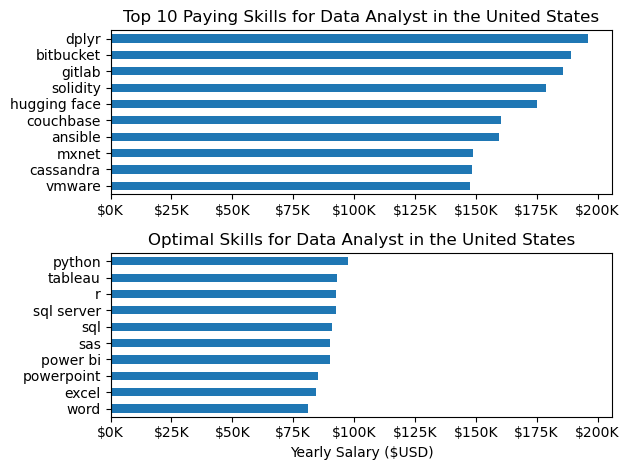

In [80]:
fig, ax = plt.subplots(2,1)

df_top_skills.plot(
    kind='barh',
    title= f'Top 10 Paying Skills for {job_title[0]} in the {country[0]}',
    ax=ax[0],
    x='job_skills',
    ylabel='',
    legend=False
)
df_optimal_skills.plot(
    kind='barh',
    title= f'Optimal Skills for {job_title[0]} in the {country[0]}', 
    ax=ax[1],
    x='job_skills',
    y='median',
    ylabel='',
    legend=False
)

# format x axis
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# order first chart by salary 
ax[0].invert_yaxis()
ax[1].invert_yaxis()

# set equal the 2 x axis
ax[1].set_xlim(ax[0].get_xlim())

# set x label 
ax[1].set_xlabel('Yearly Salary ($USD)')

# print
plt.tight_layout()
plt.show()